In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Hover Control
The state vector has the position and velocity vectors
$$
\mathbf{x}= \begin{bmatrix}
 \mathbf{p}
\\ 
\mathbf{\dot p}
\end{bmatrix}.
$$

The dynamics is described by the differential equation
$$
\mathbf{\dot x} = \begin{bmatrix}
\mathbf{\dot p}\\
-mg\mathbf{e}_3
\end{bmatrix}
+
\begin{bmatrix}
 \mathbf{0}
\\ 
\mathbf{e}_3
\end{bmatrix}
u
.
$$
where $\mathbf{e}_3= [0,0,1]^\top$.

### Euler integration

In [5]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

### Simulation parameters

In [6]:
# mass and gravity
m, g = 1, 9.8
# z unit vector
e3 = np.array([0,0,1])

tf = 6.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

# Simulation 

In [7]:
# Desired high
p_d = np.array([5, 3, 10])
v_d = np.array([0, 0, 0])

# Gains
kp, kd = 2, 3

# Initial conditions
x = np.array([0, 0, 0, 0., 0., 0.])
dx = zeros(6)

x_log = [copy(x)]

for t in time[1:]:
    p = x[:3]
    v = x[3:]
    
    # Total force 
    f_g = -m*g*e3
    
    u = kp * (p_d - p) + kd * (v_d - v)  + e3 * m * g
    
    # Dynamics
    dx[:3] = x[3:]
    dx[3:] = f_g / m + u 
    
    x = simulate(Δt, x, dx)
    x_log.append(copy(x))
    
x_log = np.array(x_log)

### Plot: time Vs z-coordinate

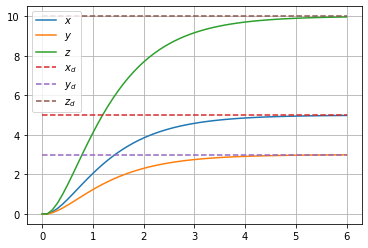

In [12]:
grid()
plot(time, x_log[:,0], label='$x$')
plot(time, x_log[:,1], label='$y$')
plot(time, x_log[:,2], label='$z$')
# desired
plot(time[[0,-1]], [p_d[0], p_d[0]], '--', label='$x_d$')
plot(time[[0,-1]], [p_d[1], p_d[1]], '--', label='$y_d$')
plot(time[[0,-1]], [p_d[2], p_d[2]], '--', label='$z_d$')
legend()

In [20]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()


def animate(t):
    ax.clear()
    
    # Path
    ax.plot(x_log[:,0], x_log[:,2], 'r--', linewidth=0.5)
    
    # Initial conditions
    ax.plot(x_log[t,0], x_log[t,2], 'bo')
    
    # Desired location
    ax.plot(p_d[0], p_d[2], 'x')
        

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)
plt.close(fig)
HTML(anim.to_jshtml())
